In [10]:
from agents import *
from optimizer import *
from process_data import *
import pandas as pd
import numpy as np

In [2]:
import glob
data = glob.glob('e1 data/*.csv')
print(f"analyzing data from {len(data)} dyads, each of whom played 10 games")

analyzing data from 100 dyads, each of whom played 10 games


# running a particular game

We can see the different moves made by a particular dyad by changing the "ID" inside move_df["ID"]==ID and removing the # before the last two statements

for ID- 91484
move blue C
starting config:


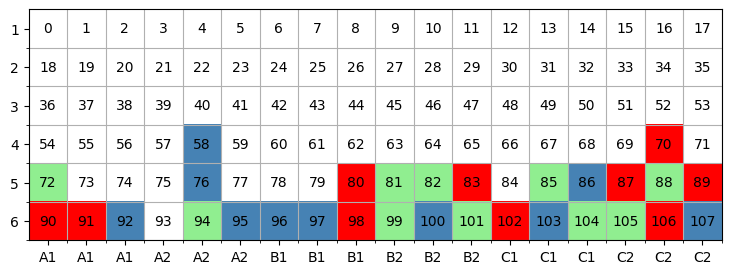

In [11]:
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

move_df = pd.read_csv("e1 results/final_move_df.csv")
#print("unique IDs=", move_df["ID"].unique())
specific = move_df[(move_df["ID"]==91484.0) & (move_df["goal"] == "move blue C")]
move_data= specific.iloc[0]
move_data.config = literal_eval(move_data.config)
move_data.moveIDs = literal_eval(move_data.moveIDs)
print("for ID-",move_data.ID)
print(move_data.goal)
print("starting config:")
general.display_config(move_data.config)
#general.run_moves(move_data.moveIDs, move_data.config)

# comparing architect/demonstrator models

We have two models: a "literal" and "pragmatic" architect/demonstrator model



In [4]:
m, c = architect.literal_architect_trial(move_data.config, "move blue C", literalA_beta= 5, goalspace = general.define_goalspace())
## COMPARE PROBABILITY OF TWO MOVES
print(m[c.index((92,84))])
print(m[c.index((82,62))])

0.02315757761367801
0.02315757761367801


In [6]:
goalspace = general.define_goalspace()
m, c = architect.pragmatic_architect_trial(move_data.config,"move blue C", general.get_initial_goal_probs(goalspace), goal_noise = 5, action_noise= 5)
## COMPARE PROBABILITY OF TWO MOVES
print(m[c.index((92,84))])
print(m[c.index((82,62))])

0.00747396526182677
0.004602232919482874


# comparing helper models

We have two helpers: "standard" ("baseline" in paper) and "probabilistic" ("careful" in paper)

In [8]:
std_softmax_moves, std_move_labels, std_goal_np = helper.standard_helper(move_data.config, (92,84), general.get_initial_goal_probs(goalspace), goalspace, goal_noise = 5, action_noise = 5)
## COMPARE PROBABILITY OF TWO MOVES: pass or 58 to 66
print(std_softmax_moves[std_move_labels.index((58,66))])
print(std_softmax_moves[std_move_labels.index(('none','none'))])

0.04540602869752949
0.0012401367898200223


In [9]:
prob_softmax_moves, prob_move_labels, prob_goal_np = helper.probabilistic_helper(move_data.config, (92,84), general.get_initial_goal_probs(goalspace), goalspace, goal_noise = 5, pass_noise = 1, action_noise = 5)
## COMPARE PROBABILITY OF TWO MOVES: pass or 58 to 66
print(prob_softmax_moves[prob_move_labels.index((58,66))])
print(prob_softmax_moves[prob_move_labels.index(('none','none'))])

0.0011083298928331279
0.9756209595088857


# questions

1. How can we find best-fitting *distributions* for the "betas" in the helper and architect models that best fit the behavioral data from the dyads? Also need to optimize for full sequence of moves instead of just the first move.
2. How do we compare the models that have more parameters to models with fewer ones, from a Bayesian perspective? For example, the *probabilistic* helper has an additional parameter (to control passing), compared to the standard helper.